In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import Ridge

from sklearn.preprocessing import StandardScaler

In [23]:
dataset = pd.read_csv('car_fuel_efficiency.csv')

In [24]:
model_dataset = dataset[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

In [25]:
model_dataset.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


<Axes: >

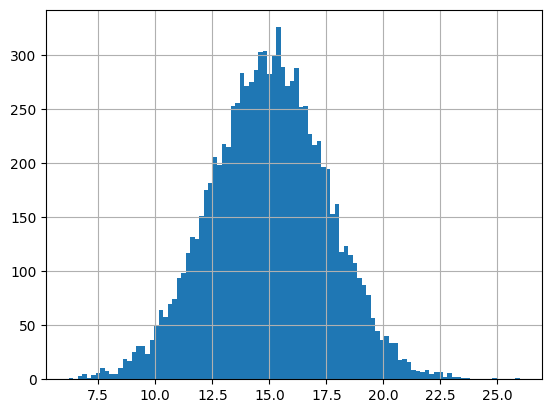

In [7]:
model_dataset['fuel_efficiency_mpg'].hist(bins=100)

In [8]:
model_dataset['horsepower'].median()

np.float64(149.0)

In [26]:
n = len(model_dataset)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

df_train = model_dataset.iloc[idx[:n_train]]
df_val = model_dataset.iloc[idx[n_train:n_train+n_val]]
df_test = model_dataset.iloc[idx[n_train+n_val:]]

In [27]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [28]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [29]:
horsepower_avg = df_train['horsepower'].mean()

df_train['horsepower'] = df_train['horsepower'].fillna(0)
df_val['horsepower'] = df_val['horsepower'].fillna(0)
df_test['horsepower'] = df_test['horsepower'].fillna(0)


In [30]:
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

In [31]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [32]:
model = LinearRegression()
model.fit(df_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
y_pred = model.predict(df_val)

rmse = root_mean_squared_error(y_val, y_pred)
rmse

0.5173782638840942

## rmse: 
- fillna with horsepower mean: 0.46359650423335236
- fillna with zero: 0.5173782638840942

In [36]:
r = [0, 0.01, 0.1, 1, 5, 10, 100]

In [38]:
for alpha in r:
    model = Ridge(alpha=alpha)
    model.fit(df_train, y_train)
    y_pred = model.predict(df_val)

    rmse = root_mean_squared_error(y_val, y_pred)
    print(f'r: {alpha}, rmse: {rmse}')

r: 0, rmse: 0.5173782638840942
r: 0.01, rmse: 0.5173782638918545
r: 0.1, rmse: 0.5173782639616967
r: 1, rmse: 0.5173782646601188
r: 5, rmse: 0.5173782677641989
r: 10, rmse: 0.5173782716442581
r: 100, rmse: 0.5173783414775488


In [39]:
np.linalg.cond(df_train)

np.float64(75.95179894706159)

In [41]:
u, s, vh = np.linalg.svd(df_train, full_matrices=False)
u,s,vh

(array([[-0.01160835, -0.01379449, -0.00445042, -0.00295412],
        [-0.01223076, -0.00856931,  0.01022107,  0.00355189],
        [-0.01143581, -0.01585331, -0.00572691, -0.0064124 ],
        ...,
        [-0.01152215, -0.01514126, -0.00101674, -0.00370937],
        [-0.01075843, -0.02102871, -0.01097397, -0.00827128],
        [-0.01129609, -0.01621181, -0.00129333, -0.00410353]],
       shape=(5824, 4)),
 array([278485.73947026,  21111.01575709,   3775.62614057,   3666.61150007]),
 array([[-0.05429341, -0.03769771, -0.83410647, -0.54762899],
        [-0.08608358, -0.06163024,  0.55159306, -0.82736717],
        [-0.9332151 ,  0.3524202 , -0.00117973,  0.07005841],
        [-0.34460327, -0.93304909, -0.00317954,  0.103237  ]]))

In [42]:
print("Top 5 singular values:", s[:5])
print("Smallest singular value:", s[-1])

Top 5 singular values: [278485.73947026  21111.01575709   3775.62614057   3666.61150007]
Smallest singular value: 3666.6115000694062


In [44]:
scaler = StandardScaler().fit(df_train)
df_train_s = scaler.transform(df_train)
df_val_s = scaler.transform(df_val)

In [48]:
coef_norms = []
for alpha in r:
    model = Ridge(alpha=alpha)
    model.fit(df_train_s, y_train)
    y_pred = model.predict(df_val_s)
    coef_norms.append(np.linalg.norm(model.coef_))
    rmse = root_mean_squared_error(y_val, y_pred)
    print(f'r: {alpha}, rmse: {rmse}')
print(coef_norms)

r: 0, rmse: 0.5173782638840941
r: 0.01, rmse: 0.5173782796573567
r: 0.1, rmse: 0.5173784233412723
r: 1, rmse: 0.5173800308520206
r: 5, rmse: 0.51739092323232
r: 10, rmse: 0.517413113847389
r: 100, rmse: 0.5193840367505088
[np.float64(2.501558642182482), np.float64(2.501554354749531), np.float64(2.5015157685147518), np.float64(2.501129971671091), np.float64(2.499416758743717), np.float64(2.4972785424372437), np.float64(2.4594071483520286)]


In [47]:
u_s, s_s, vh_s = np.linalg.svd(df_train_s, full_matrices=False)
print("\nAfter StandardScaler: top singular values (scaled):", s_s[:5])
print("smallest singular value (scaled):", s_s[-1])


After StandardScaler: top singular values (scaled): [77.41322255 76.64672584 75.8977689  75.286128  ]
smallest singular value (scaled): 75.28612800246245


In [49]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [57]:
def linear_regression(seed):
    
    n = len(model_dataset)
    
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train = model_dataset.iloc[idx[:n_train]]
    df_val = model_dataset.iloc[idx[n_train:n_train+n_val]]
    df_test = model_dataset.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    df_train['horsepower'] = df_train['horsepower'].fillna(0)
    df_val['horsepower'] = df_val['horsepower'].fillna(0)
    df_test['horsepower'] = df_test['horsepower'].fillna(0)
    
    y_train = df_train['fuel_efficiency_mpg']
    y_val = df_val['fuel_efficiency_mpg']
    y_test = df_test['fuel_efficiency_mpg']
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    
    model = LinearRegression()
    model.fit(df_train, y_train)
    y_pred = model.predict(df_val)
    
    rmse = root_mean_squared_error(y_val, y_pred)
    print(f'seed: {seed}, rmse: {rmse}')
    return rmse

In [58]:
rmse_list = []
for seed in seeds:
    rmse = linear_regression(seed)
    rmse_list.append(rmse)

seed: 0, rmse: 0.5206531296298021
seed: 1, rmse: 0.5213388912857011
seed: 2, rmse: 0.5228069974801978
seed: 3, rmse: 0.5159516741173589
seed: 4, rmse: 0.5109129460065402
seed: 5, rmse: 0.5283406460165996
seed: 6, rmse: 0.5313910658170696
seed: 7, rmse: 0.5090670387374385
seed: 8, rmse: 0.5147399129350905
seed: 9, rmse: 0.5131865908331017


In [59]:
np.std(rmse_list)

np.float64(0.0069894464277773525)